<a href="https://colab.research.google.com/github/yamenetoo/Artificial-Neural-Network-Analysis-Using-Statistical-Approaches/blob/main/Git_IrIsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base Model

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k=10
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

inputs = tf.keras.Input(shape=(4,))
x = tf.keras.layers.Dense(k, activation='relu', name='hidden_layer')(inputs)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=0)
_ = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer (Dense)                 │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251 (1008.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 168 (676.00 B)

In [ ]:
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9667 - loss: 0.1430


[0.14297033846378326, 0.9666666388511658]

In [ ]:
hidden_layer_output_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('hidden_layer').output)
last_hidden_layer_output = hidden_layer_output_model.predict(X_test)
output_layer_weights = model.layers[-1].get_weights()[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


#each node to output

In [ ]:
k = 0  # index of the hidden neuron you are interested in
n = X_test.shape[0]  # number of test samples
# Extract the outputs of the k-th hidden neuron for each sample
hidden_neuron_outputs = last_hidden_layer_output[:, k]
# Extract the weights corresponding to the k-th hidden neuron for all output classes
weights_for_k = output_layer_weights[k, :]
# Compute the weighted outputs for the k-th hidden neuron
weighted_outputs = hidden_neuron_outputs[:, np.newaxis] * weights_for_k
# weighted_outputs

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# # Assuming weighted_outputs is a NumPy array with shape (n_samples, n_output_classes)
# # Example: For demonstration, we'll create some mock data
# n_samples = n
# n_output_classes = 3
# # Plot boxplots for each output class
# plt.figure(figsize=(12, 8))

# plt.boxplot([weighted_outputs[:, i] for i in range(n_output_classes)],
#             labels=[f'Output Class {i}' for i in range(n_output_classes)],
#             notch=True,
#             patch_artist=True)

# plt.title('Boxplot of Weighted Outputs for Each Output Class')
# plt.xlabel('Output Class')
# plt.ylabel('Weighted Output Value')
# plt.grid(True)
# plt.show()
# _=plt.boxplot(weighted_outputs)


In [ ]:
import numpy as np

AllOutput=[]
n = X_test.shape[0]  # number of test samples
number_hidden_neurons=10
# Extract the outputs of the k-th hidden neuron for each sample
for k in range(number_hidden_neurons):
  hidden_neuron_outputs = last_hidden_layer_output[:, k]
  weights_for_k = output_layer_weights[k, :]
  weighted_outputs = hidden_neuron_outputs[:, np.newaxis] * weights_for_k
  AllOutput.append(weighted_outputs)
AllOutput=np.array(AllOutput)
AllOutput.shape

(10, 30, 3)

In [ ]:
from scipy.stats import kruskal
for k in range(10):
  AllOutput_k = AllOutput[k]
  data_col1 = AllOutput_k[:, 0]
  data_col2 = AllOutput_k[:, 1]
  data_col3 = AllOutput_k[:, 2]
  h_statistic, p_value = kruskal(data_col1, data_col2, data_col3)
  # h_statistic, p_value = kruskal( *AllOutput[k].T  )
  print(f"Kruskal-Wallis H Statistic: {h_statistic} P-value: {p_value}")
# Interpretation:
# - A low p-value (< 0.05) suggests that there are significant differences between the medians.
# - A high p-value suggests that there is no significant difference in the medians.

Kruskal-Wallis H Statistic: 50.50925606177165 P-value: 1.0766000698756034e-11
Kruskal-Wallis H Statistic: 28.755412358810812 P-value: 5.699562808027979e-07
Kruskal-Wallis H Statistic: 28.75541235881089 P-value: 5.69956280802775e-07
Kruskal-Wallis H Statistic: 28.863827987362356 P-value: 5.398826727495826e-07
Kruskal-Wallis H Statistic: 50.97016839046075 P-value: 8.550048202894136e-12
Kruskal-Wallis H Statistic: 58.07504287120936 P-value: 2.4499920344780735e-13
Kruskal-Wallis H Statistic: 6.762899060516791 P-value: 0.033998137670663564
Kruskal-Wallis H Statistic: 31.12816657917759 P-value: 1.740221425856688e-07
Kruskal-Wallis H Statistic: 35.92585232693901 P-value: 1.580521064743012e-08
Kruskal-Wallis H Statistic: 79.12087912087912 P-value: 6.593551417550709e-18


In [ ]:
from scipy.stats import mannwhitneyu
for k in range(10):
  AllOutput_k = AllOutput[k]
  data_col1 = AllOutput_k[:, 0]
  data_col2 = AllOutput_k[:, 1]
  data_col3 = AllOutput_k[:, 2]
  results = {}
  stat1, p_value1 = mannwhitneyu(data_col1, data_col2, alternative='two-sided')
  results['O1 vs  O2'] = (stat1, p_value1)
  stat2, p_value2 = mannwhitneyu(data_col1, data_col3, alternative='two-sided')
  results['O1 vs O3'] = (stat2, p_value2)
  stat3, p_value3 = mannwhitneyu(data_col2, data_col3, alternative='two-sided')
  results['O2 vs O3'] = (stat3, p_value3)
  for comparison, (stat, p_value) in results.items():
      print(f"k={k}")
      print(f"{comparison}:")
      print(f"  Mann-Whitney U Statistic: {stat} P-value: {p_value}")
      print("=============")
# Interpretation:
# - A low p-value (< 0.05) suggests that there are significant differences between the distributions of the two columns.
# - A high p-value suggests that there is no significant difference between the distributions.

k=0
O1 vs  O2:
  Mann-Whitney U Statistic: 316.0 P-value: 0.044300864169008476
k=0
O1 vs O3:
  Mann-Whitney U Statistic: 50.0 P-value: 1.758959086488839e-09
k=0
O2 vs O3:
  Mann-Whitney U Statistic: 50.0 P-value: 1.758959086488839e-09
k=1
O1 vs  O2:
  Mann-Whitney U Statistic: 408.5 P-value: 0.48281837752725454
k=1
O1 vs O3:
  Mann-Whitney U Statistic: 719.5 P-value: 4.137752332183971e-06
k=1
O2 vs O3:
  Mann-Whitney U Statistic: 719.5 P-value: 4.137752332183971e-06
k=2
O1 vs  O2:
  Mann-Whitney U Statistic: 719.5 P-value: 4.137752332183971e-06
k=2
O1 vs O3:
  Mann-Whitney U Statistic: 719.5 P-value: 4.137752332183971e-06
k=2
O2 vs O3:
  Mann-Whitney U Statistic: 408.5 P-value: 0.48281837752725454
k=3
O1 vs  O2:
  Mann-Whitney U Statistic: 719.5 P-value: 4.137752332183971e-06
k=3
O1 vs O3:
  Mann-Whitney U Statistic: 719.5 P-value: 4.137752332183971e-06
k=3
O2 vs O3:
  Mann-Whitney U Statistic: 399.5 P-value: 0.392094391313506
k=4
O1 vs  O2:
  Mann-Whitney U Statistic: 300.0 P-value: 0

# each node are RV i mean 10 output analysis

In [ ]:
import pandas as pd
df = pd.DataFrame(last_hidden_layer_output, columns=[f'Neuron_{i}' for i in range(1,11)])
df

,Neuron_1,Neuron_2,Neuron_3,Neuron_4,Neuron_5,Neuron_6,Neuron_7,Neuron_8,Neuron_9,Neuron_10
0,0.124355,0.154244,0.460738,1.600283,0.004579,0.000000,0.000000,1.344940,0.000000,1.147511
1,1.707796,0.000000,2.874927,0.000000,0.000000,0.992714,0.750437,0.000000,3.287311,0.175460
2,0.000000,2.503711,0.000000,4.093118,1.976380,0.000000,0.000000,2.430906,0.000000,1.141091
3,0.000000,0.428091,0.212120,1.288688,0.441609,0.000000,0.000000,1.005065,0.000000,0.655154
4,0.000000,0.789750,0.591430,2.230830,0.434040,0.000000,0.000000,1.420828,0.000000,1.215945
5,2.025455,0.000000,1.939294,0.000000,0.000000,0.889137,0.948322,0.000000,3.017484,0.522979
6,0.501715,0.000000,0.215990,0.645844,0.059886,0.000000,0.069999,0.606518,0.095047,0.622777
7,0.000000,1.786332,0.078372,1.926190,1.822941,0.000000,0.000000,0.873577,0.000000,0.000000
8,0.216982,1.050481,0.000000,2.725117,0.474215,0.000000,0.000000,1.892343,0.000000,1.731530
9,0.575586,0.102159,0.118850,1.267909,0.000000,0.000000,0.000000,1.055809,0.000000,1.108014


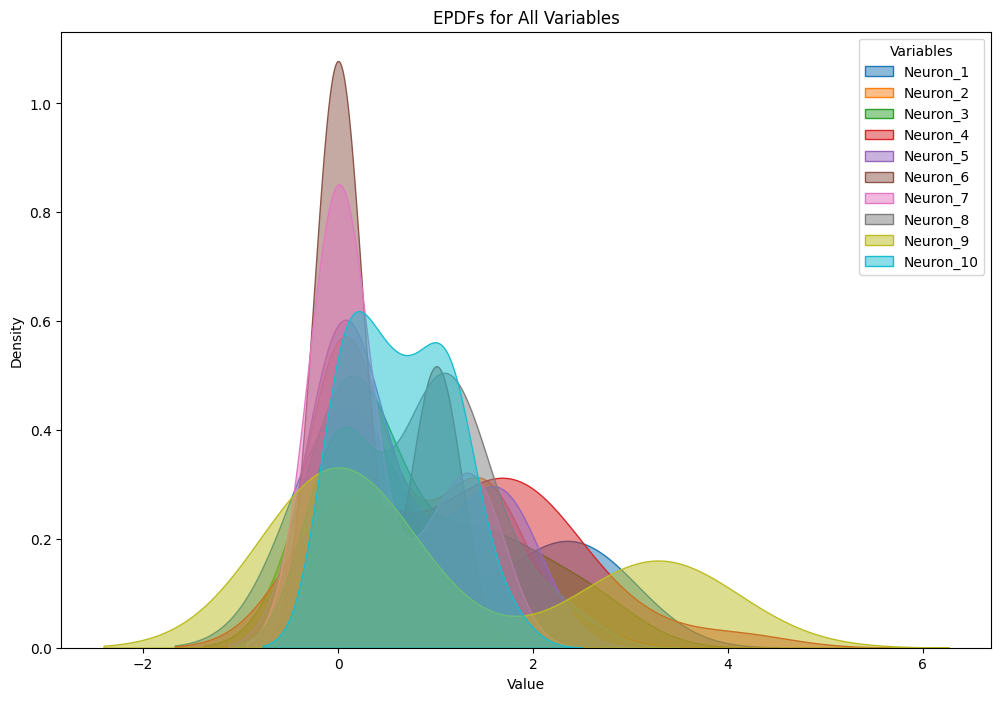

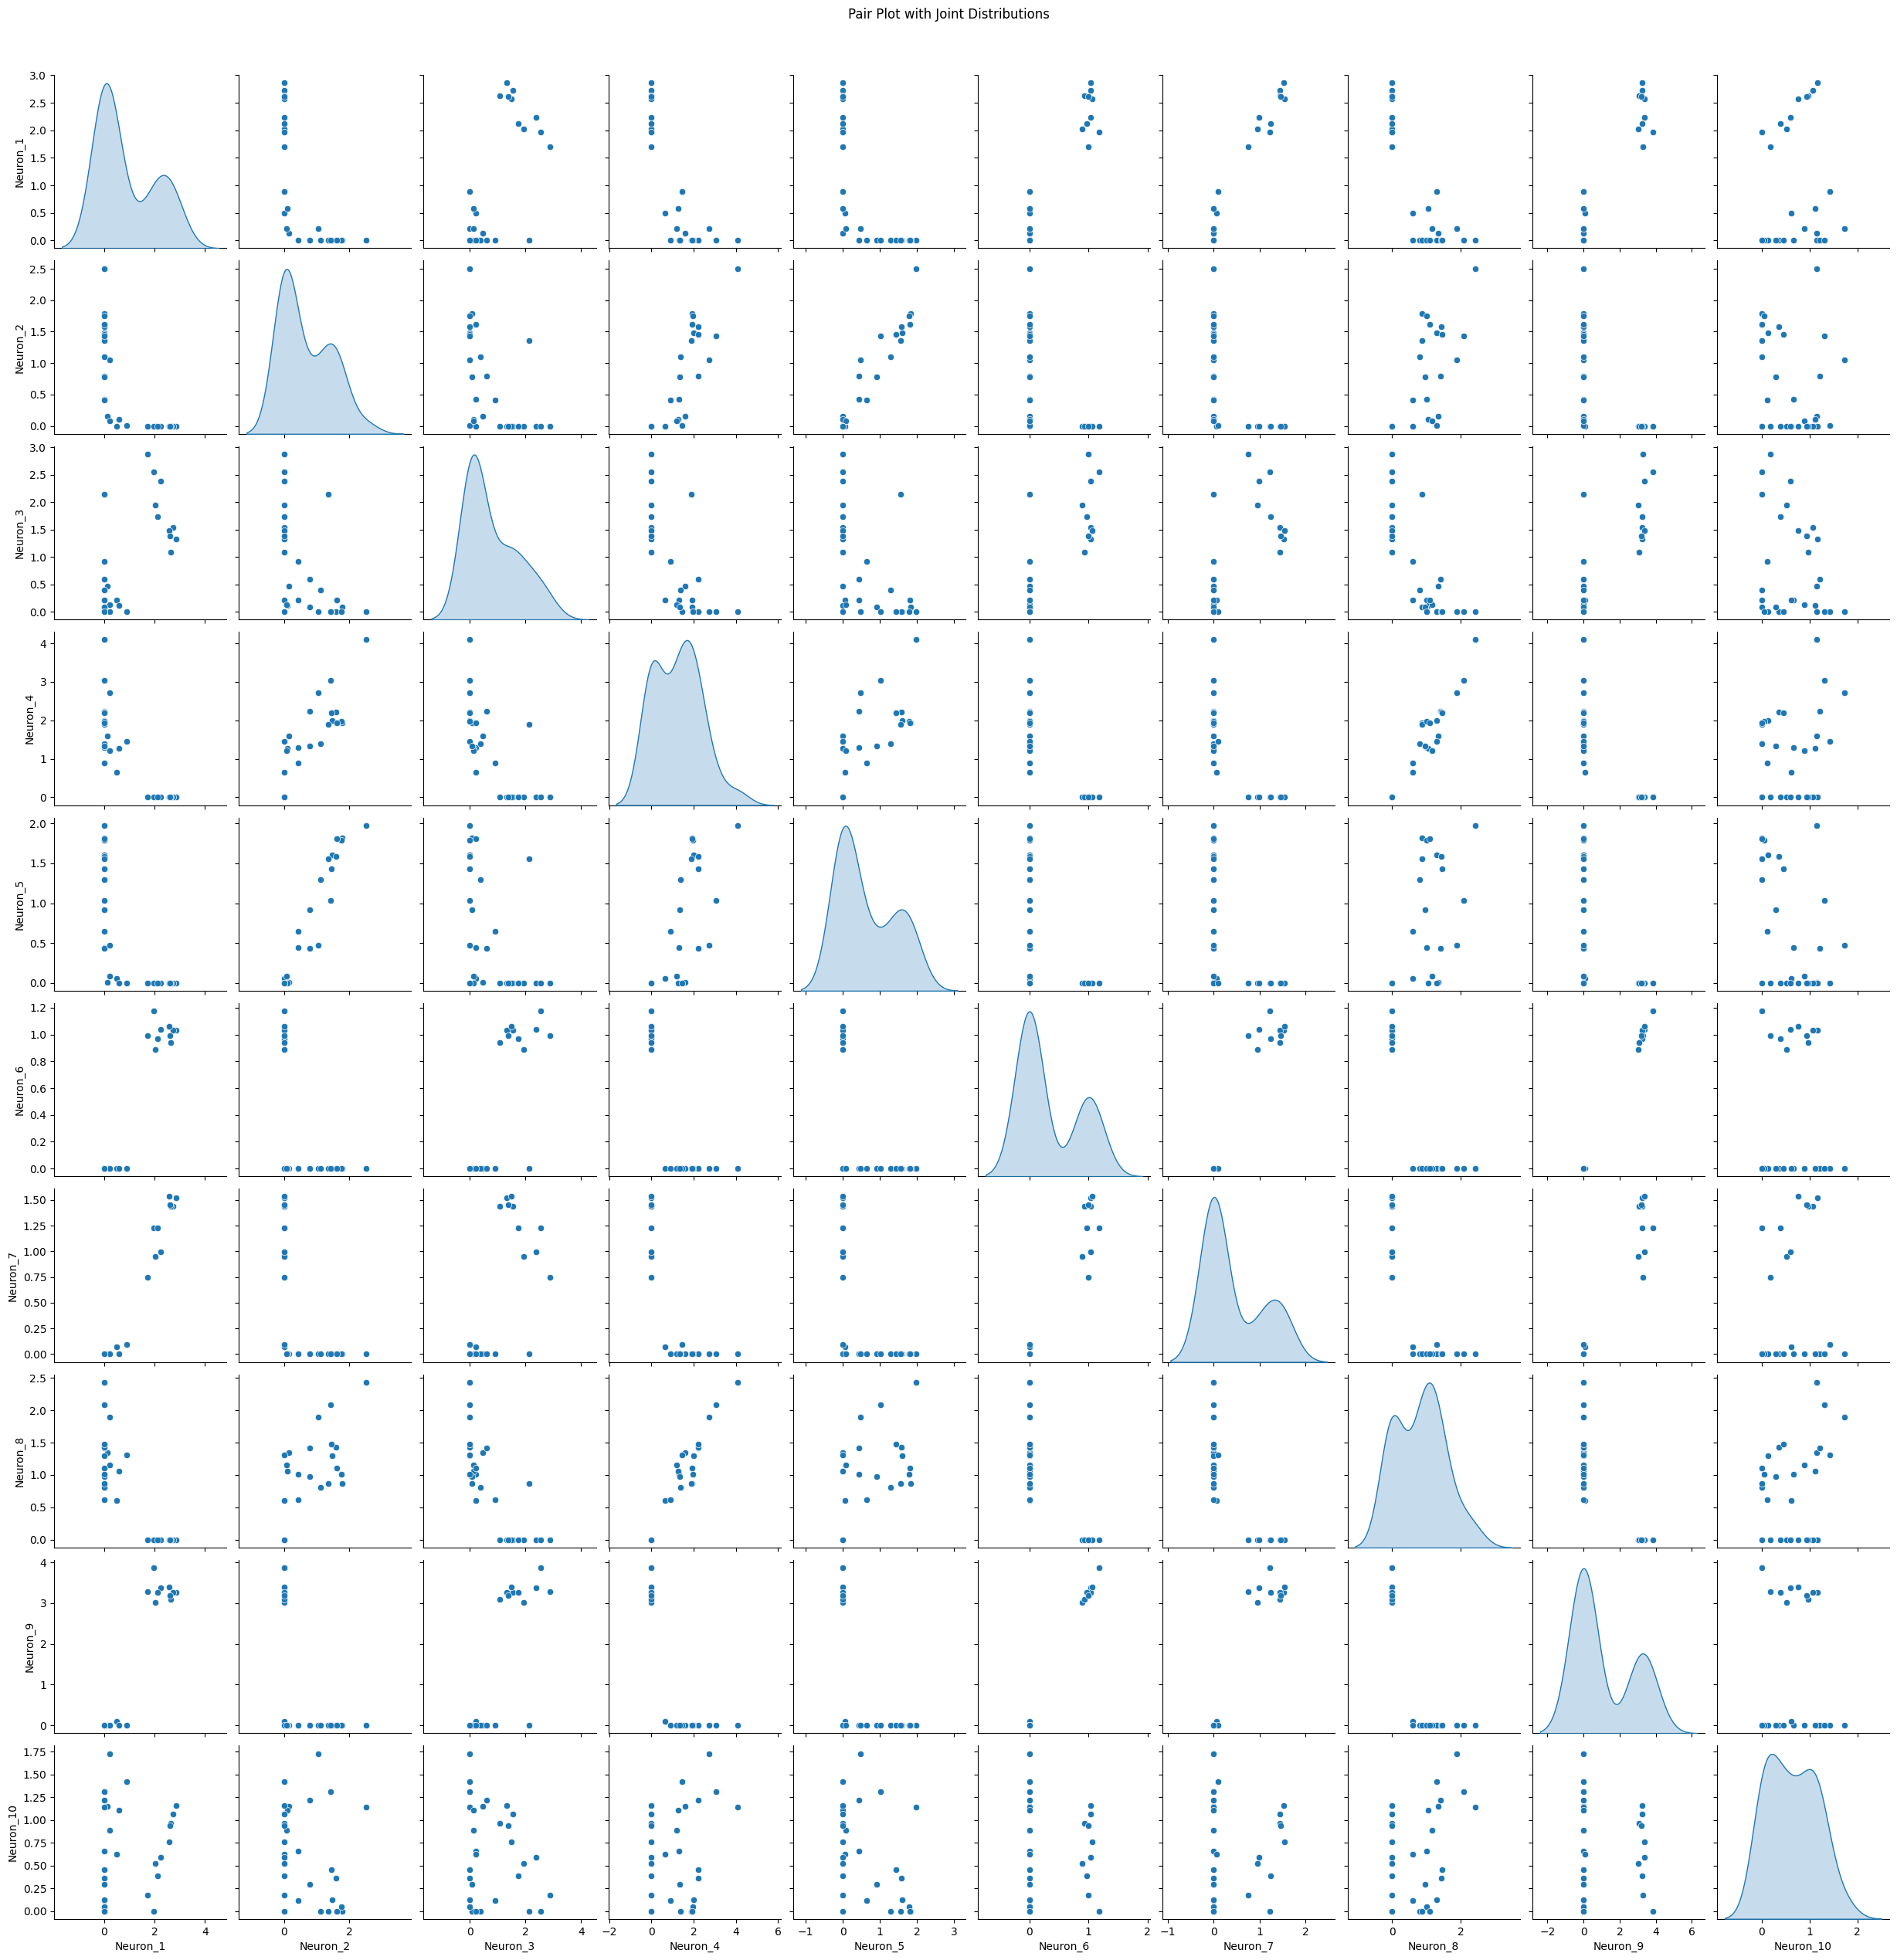

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
colors = sns.color_palette("tab10", n_colors=10)  # Use a color palette for 10 variables

for i, column in enumerate(df.columns):
    sns.kdeplot(df[column], fill=True, label=column, color=colors[i], alpha=0.5)

plt.title('EPDFs for All Variables')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(title='Variables')
plt.show()

# Plot joint distributions using pair plot
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot with Joint Distributions', y=1.02)
plt.show()

Correlation Matrix:
           Neuron_1  Neuron_2  Neuron_3  Neuron_4  Neuron_5  Neuron_6  \
Neuron_1   1.000000 -0.696487  0.712533 -0.822041 -0.686463  0.960451   
Neuron_2  -0.696487  1.000000 -0.544722  0.859787  0.966107 -0.627107   
Neuron_3   0.712533 -0.544722  1.000000 -0.717347 -0.494967  0.825737   
Neuron_4  -0.822041  0.859787 -0.717347  1.000000  0.744559 -0.810990   
Neuron_5  -0.686463  0.966107 -0.494967  0.744559  1.000000 -0.611817   
Neuron_6   0.960451 -0.627107  0.825737 -0.810990 -0.611817  1.000000   
Neuron_7   0.981211 -0.621500  0.714900 -0.794649 -0.606098  0.969511   
Neuron_8  -0.821581  0.720611 -0.778357  0.967784  0.590793 -0.838709   
Neuron_9   0.957334 -0.630172  0.830662 -0.813738 -0.614640  0.999551   
Neuron_10  0.182508 -0.249294 -0.231678  0.152207 -0.451511  0.013518   

           Neuron_7  Neuron_8  Neuron_9  Neuron_10  
Neuron_1   0.981211 -0.821581  0.957334   0.182508  
Neuron_2  -0.621500  0.720611 -0.630172  -0.249294  
Neuron_3   0.7149

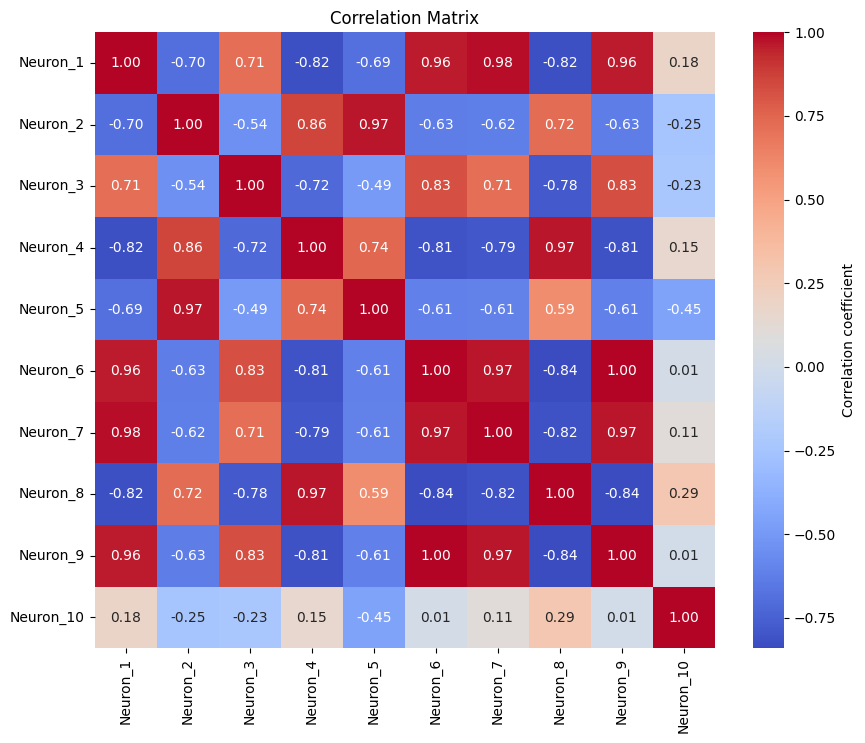

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix')
plt.show()


In [ ]:
correlation_matrix

,Neuron_1,Neuron_2,Neuron_3,Neuron_4,Neuron_5,Neuron_6,Neuron_7,Neuron_8,Neuron_9,Neuron_10
Neuron_1,1.000000,-0.696487,0.712533,-0.822041,-0.686463,0.960451,0.981211,-0.821581,0.957334,0.182508
Neuron_2,-0.696487,1.000000,-0.544722,0.859787,0.966107,-0.627107,-0.621500,0.720611,-0.630172,-0.249294
Neuron_3,0.712533,-0.544722,1.000000,-0.717347,-0.494967,0.825737,0.714900,-0.778357,0.830662,-0.231678
Neuron_4,-0.822041,0.859787,-0.717347,1.000000,0.744559,-0.810990,-0.794649,0.967784,-0.813738,0.152207
Neuron_5,-0.686463,0.966107,-0.494967,0.744559,1.000000,-0.611817,-0.606098,0.590793,-0.614640,-0.451511
Neuron_6,0.960451,-0.627107,0.825737,-0.810990,-0.611817,1.000000,0.969511,-0.838709,0.999551,0.013518
Neuron_7,0.981211,-0.621500,0.714900,-0.794649,-0.606098,0.969511,1.000000,-0.818305,0.965422,0.105726
Neuron_8,-0.821581,0.720611,-0.778357,0.967784,0.590793,-0.838709,-0.818305,1.000000,-0.841027,0.292959
Neuron_9,0.957334,-0.630172,0.830662,-0.813738,-0.614640,0.999551,0.965422,-0.841027,1.000000,0.005006
Neuron_10,0.182508,-0.249294,-0.231678,0.152207,-0.451511,0.013518,0.105726,0.292959,0.005006,1.000000


# dim red


## clustr

In [ ]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=correlation_matrix
distance_matrix = 1 - corr_matrix
linkage_matrix = sch.linkage(distance_matrix, method='ward')
dendrogram = sch.dendrogram(linkage_matrix, labels=corr_matrix.columns, orientation='top', distance_sort='descending')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix with Hierarchical Clustering')
# plt.show()
# Cut the dendrogram to create 3 clusters
clusters = sch.fcluster(linkage_matrix, t=3, criterion='maxclust')
# Create a DataFrame for the clusters
cluster_df = pd.DataFrame({
    'Node': corr_matrix.columns,
    'Cluster': clusters
})
# print(cluster_df)

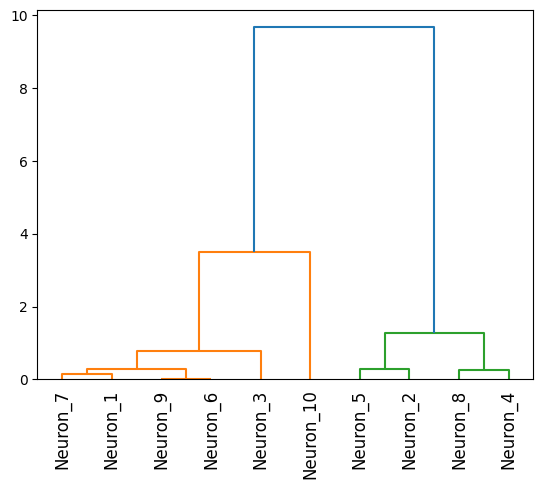

In [ ]:
dendrogram = sch.dendrogram(linkage_matrix, labels=corr_matrix.columns, orientation='top', distance_sort='descending')
plt.xticks(rotation=90)
plt.show()

In [ ]:
cluster_df

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
original_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu', name='hidden_layer'),
    tf.keras.layers.Dense(3, activation='softmax')
])
original_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
original_model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=0)
original_weights = original_model.get_weights()
data = {
    'Node': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Cluster': cluster_df.Cluster.tolist()
}
df_clusters = pd.DataFrame(data)

def create_cluster_model(neurons_in_cluster):
    # Define a new model with only the neurons in the current cluster
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(4,)),
        tf.keras.layers.Dense(len(neurons_in_cluster), activation='relu', name='hidden_layer'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    return model

def set_cluster_weights(model, original_weights, neurons_in_cluster):
    weights = original_weights[0]  # Weights of the dense layer
    biases = original_weights[1]   # Biases of the dense layer
    new_weights = weights[:, neurons_in_cluster]  # Extract weights for neurons in the cluster
    new_biases = biases[neurons_in_cluster]       # Extract biases for neurons in the cluster
    model.layers[0].set_weights([new_weights, new_biases])
    return model

clusters = df_clusters.groupby('Cluster')['Node'].apply(list).to_dict()
cluster_models = {}
for cluster, neurons in clusters.items():
    cluster_model = create_cluster_model(neurons)
    cluster_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    cluster_model = set_cluster_weights(cluster_model, original_weights, neurons)
    cluster_models[f'Cluster {cluster}'] = cluster_model

for cluster_name, model in cluster_models.items():
    print(f"Training and evaluating model for {cluster_name}")
    model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy for {cluster_name}: {accuracy:.2f}")

for cluster_name, model in cluster_models.items():
    print(f"Model summary for {cluster_name}:")
    model.summary()

Training and evaluating model for Cluster 1
Accuracy for Cluster 1: 1.00
Training and evaluating model for Cluster 2
Accuracy for Cluster 2: 0.97
Training and evaluating model for Cluster 3


Accuracy for Cluster 3: 0.73
Model summary for Cluster 1:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)                 │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107 (432.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 72 (292.00 B)

Model summary for Cluster 2:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)                 │ (None, 5)                   │              25 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (528.00 B)

 Trainable params: 43 (172.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88 (356.00 B)

Model summary for Cluster 3:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)                 │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35 (144.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24 (100.00 B)

## PCA

# Model Validation

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
def create_base_model():
    inputs = tf.keras.Input(shape=(4,))
    x = tf.keras.layers.Dense(10, activation='relu', name='hidden_layer')(inputs)
    outputs = tf.keras.layers.Dense(3, activation='softmax')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

def create_transfer_learning_model(base_model):
    new_model = tf.keras.models.clone_model(base_model)
    new_model.set_weights(base_model.get_weights())  # Transfer weights from the base model
    new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return new_model

base_model = create_base_model()
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
base_model.fit(X, y, epochs=50, batch_size=5, verbose=0)

In [ ]:
def train_and_evaluate(RS,base_model=base_model):
    accuracies = []
    W=[]
    num_iterations=len(RS)
    initial_weights = base_model.get_weights()
    for i in range(num_iterations):
        random_state = RS[i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        # Create a new transfer learning model
        transfer_learning_model = create_transfer_learning_model(base_model)
        # Set the initial weights to the saved weights from the base model
        transfer_learning_model.set_weights(initial_weights)
        # Define early stopping callback
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        # Retrain the model with early stopping
        transfer_learning_model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test, y_test),
                                    callbacks=[early_stopping], verbose=0)
        W.append(transfer_learning_model.get_weights())
        # Evaluate the model on the test set
        accuracy = transfer_learning_model.evaluate(X_test, y_test, verbose=0)[1]
        accuracies.append(accuracy)
        # Optional: Print progress
        print(f"Iteration {i+1}/{num_iterations} - Test accuracy: {accuracy:.2f}")
    return accuracies,W
# Run the process
B=1000
RS=np.random.randint(0, 1000,B)
accuracies,W = train_and_evaluate(RS)
average_accuracy = np.mean(accuracies)
print(f"Average test accuracy over 1000 iterations: {average_accuracy:.2f}")

Iteration 1/1000 - Test accuracy: 0.90
Iteration 2/1000 - Test accuracy: 1.00
Iteration 3/1000 - Test accuracy: 0.97
Iteration 4/1000 - Test accuracy: 0.90
Iteration 5/1000 - Test accuracy: 1.00
Iteration 6/1000 - Test accuracy: 0.97
Iteration 7/1000 - Test accuracy: 0.97
Iteration 8/1000 - Test accuracy: 1.00
Iteration 9/1000 - Test accuracy: 0.93
Iteration 10/1000 - Test accuracy: 0.93
Iteration 11/1000 - Test accuracy: 0.90
Iteration 12/1000 - Test accuracy: 1.00
Iteration 13/1000 - Test accuracy: 0.93
Iteration 14/1000 - Test accuracy: 0.90
Iteration 15/1000 - Test accuracy: 0.97
Iteration 16/1000 - Test accuracy: 1.00
Iteration 17/1000 - Test accuracy: 0.93
Iteration 18/1000 - Test accuracy: 0.97
Iteration 19/1000 - Test accuracy: 0.93
Iteration 20/1000 - Test accuracy: 0.93
Iteration 21/1000 - Test accuracy: 1.00
Iteration 22/1000 - Test accuracy: 0.97
Iteration 23/1000 - Test accuracy: 0.97
Iteration 24/1000 - Test accuracy: 0.90
Iteration 25/1000 - Test accuracy: 1.00
Iteration

KeyboardInterrupt: 

## Confidence Interval Based on Central Limit Theorem

In [ ]:
B=len(accuracies)
alpha = 0.05 # Significance level for 95% confidence interval
mean_accuracy = np.mean(accuracies)
differences = abs(accuracies - mean_accuracy)
sorted_differences = np.sort(differences)
lower_percentile_index = int(B * (1 - alpha / 2))
upper_percentile_index = int(B * (alpha / 2))
# Percentiles
print(lower_percentile_index,upper_percentile_index)
lower_percentile = sorted_differences[lower_percentile_index]
upper_percentile = sorted_differences[upper_percentile_index]
# Step 4: Compute Confidence Interval
CLI = mean_accuracy - lower_percentile
CUI = mean_accuracy + upper_percentile
# Print results
print(f"Mean Accuracy (ACC¯): {mean_accuracy:.4f}")
print(f"Lower Percentile of Differences: {lower_percentile:.4f}")
print(f"Upper Percentile of Differences: {upper_percentile:.4f}")
print(f"Confidence Interval Lower Limit (CLI): {CLI:.4f}")
print(f"Confidence Interval Upper Limit (CUI): {CUI:.4f}")

975 25
Mean Accuracy (ACC¯): 0.9614
Lower Percentile of Differences: 0.0914
Upper Percentile of Differences: 0.0086
Confidence Interval Lower Limit (CLI): 0.8700
Confidence Interval Upper Limit (CUI): 0.9700


In [ ]:
import numpy as np
from scipy import stats
confidence_level = 0.95  # Desired confidence level
alpha = 1 - confidence_level  # Significance level
n = len(accuracies)  # Number of bootstrap samples
mean_accuracy = np.mean(accuracies)
std_dev = np.std(accuracies, ddof=1)  # Sample standard deviation
degrees_of_freedom = n - 1
t_critical = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)
margin_of_error = t_critical * (std_dev / np.sqrt(n))
CLI = mean_accuracy - margin_of_error
CUI = mean_accuracy + margin_of_error
print(f"Mean Accuracy (ACC¯): {mean_accuracy:.4f}")
print(f"Standard Deviation: {std_dev:.4f}")
print(f"Critical t-value: {t_critical:.4f}")
print(f"Margin of Error: {margin_of_error:.4f}")
print(f"Confidence Interval Lower Limit (CLI): {CLI:.4f}")
print(f"Confidence Interval Upper Limit (CUI): {CUI:.4f}")

Mean Accuracy (ACC¯): 0.9614
Standard Deviation: 0.0352
Critical t-value: 1.9623
Margin of Error: 0.0022
Confidence Interval Lower Limit (CLI): 0.9592
Confidence Interval Upper Limit (CUI): 0.9636
